<a href="https://colab.research.google.com/github/Sant18/Loan_data_analysis/blob/main/Loan_Dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import files
uploaded = files.upload()

Saving loan_ds.csv to loan_ds (1).csv


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import seaborn as sns

In [73]:
df = pd.read_csv(io.BytesIO(uploaded['loan_ds.csv']))

In [74]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

Check data types

In [75]:
def check_col_type(df):
  col = []
  typ = []
  for i in df.columns:
    col.append(i)
    typ.append(df[i].dtype)
  df_ = pd.DataFrame(zip(col, typ)).rename(columns={0:'Column', 1:'dtype'})
  return df_

In [76]:
check_col_type(df)

,Column,dtype
0,Loan_ID,object
1,Gender,object
2,Married,object
3,Dependents,object
4,Education,object
5,Self_Employed,object
6,ApplicantIncome,int64
7,Loan_Amount_Term,float64
8,CoapplicantIncome,int64
9,LoanAmount,float64


Check unique values

In [77]:
def check_unique_vals(df):
  col = []
  uni_lst = []
  for i in df.columns:
    col.append(i)
    uni = df[i].unique()
    if len(uni) > 10:
      uni_lst.append(len(uni))
    else:
      uni_lst.append(uni)
  
  df_ = pd.DataFrame(zip(col, uni_lst)).rename(columns={0:'Columns', 1:'Values'})
  return df_

In [78]:
check_unique_vals(df)

,Columns,Values
0,Loan_ID,614
1,Gender,"[nan, Male, Female]"
2,Married,"[Yes, No, nan]"
3,Dependents,"[3+, 0, 1, 2, nan]"
4,Education,"[Graduate, Not Graduate]"
5,Self_Employed,"[No, Yes, nan]"
6,ApplicantIncome,505
7,Loan_Amount_Term,11
8,CoapplicantIncome,287
9,LoanAmount,204


In [79]:
def check_null():
  temp = pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2))
  temp_df = temp.rename(columns={0:'Perc/Null'}).sort_values(by='Perc/Null', ascending=False)
  temp_df = temp_df[temp_df['Perc/Null'] != 0]
  return temp_df

Check null values

In [80]:
def check_null_vals(df):
  df_ = pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2))
  df_ = df_.rename(columns={0:'Null_%'})
  df_ = df_.sort_values(by='Null_%', ascending=False)
  df_ = df_.loc[df_['Null_%'] != 0]
  return df_

In [81]:
check_null_vals(df)

,Null_%
Credit_History,8.14
Self_Employed,5.21
LoanAmount,3.58
Dependents,2.44
Loan_Amount_Term,2.28
Gender,2.12
Married,0.49


Group by/Pivot Tables/Plots


In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001585,NaN,Yes,3+,Graduate,No,51763,300.0,0,700.0,1.0,Urban,Y
1,LP001469,Male,No,0,Graduate,Yes,20166,480.0,0,650.0,NaN,Urban,Y
2,LP001536,Male,Yes,3+,Graduate,No,39999,180.0,0,600.0,0.0,Semiurban,Y
3,LP002813,Female,Yes,1,Graduate,Yes,19484,360.0,0,600.0,1.0,Semiurban,Y
4,LP002191,Male,Yes,0,Graduate,No,19730,360.0,5266,570.0,1.0,Rural,N


In [83]:
pd.DataFrame(df.Gender.value_counts(dropna=False))

,Gender
Male,489
Female,112
NaN,13


In [84]:
df['Loan_Status_num'] = [1 if i == 'Y' else 0 for i in df['Loan_Status']]

In [85]:
df['Loan_Status_num'].dtype

dtype('int64')

In [86]:
(pd.DataFrame(round(df.groupby('Gender')['Loan_Status_num'].mean(), 2))*100)

,Loan_Status_num
Gender,
Female,67.0
Male,69.0


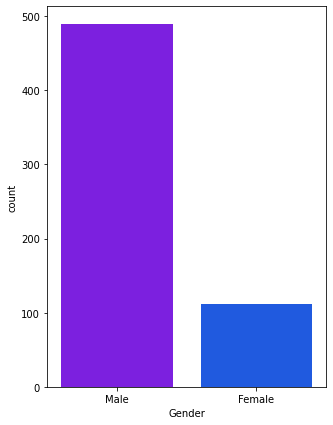

In [87]:
fig, ax = plt.subplots(figsize=(5, 7))

sns.countplot(x='Gender', data=df, ax=ax)
plt.show()

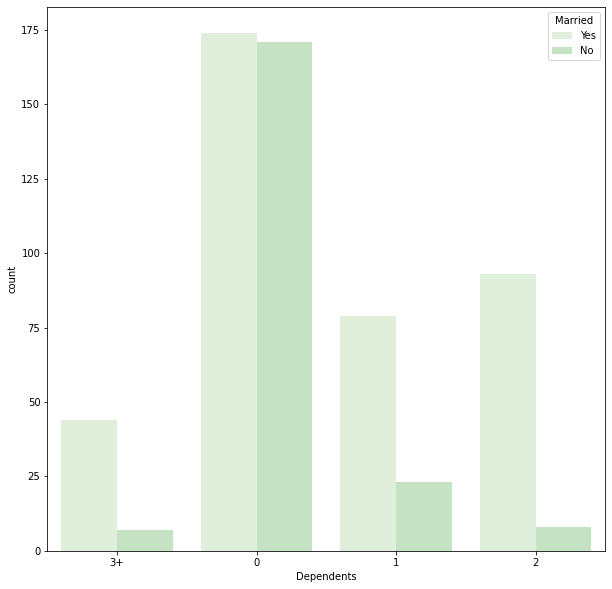

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
pal = sns.color_palette("pastel")
sns.set_palette("GnBu")

sns.countplot(x='Dependents', data=df, ax=ax, hue='Married')
plt.show()

In [89]:
pd.DataFrame(df.groupby('Dependents')['ApplicantIncome'].mean())*100

,ApplicantIncome
Dependents,
0,491742.318841
1,596227.450980
2,492678.217822
3+,858121.568627


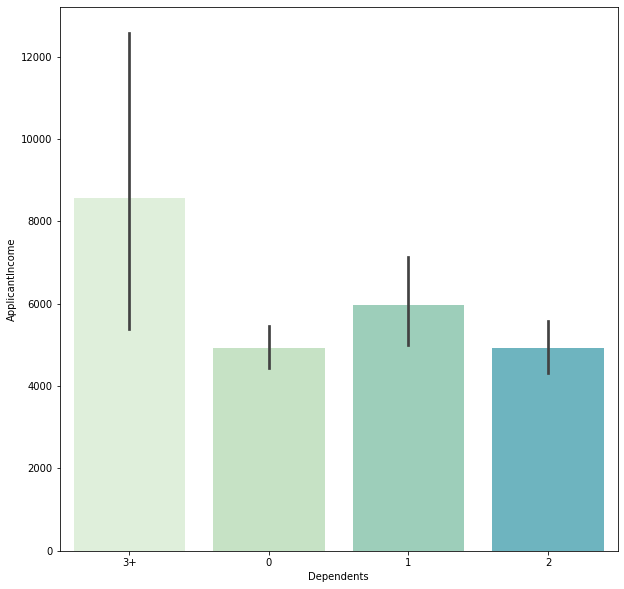

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x='Dependents', y='ApplicantIncome', data=df, ax=ax)

In [91]:
(pd.DataFrame(round(df.groupby('Married')['Loan_Status_num'].mean(), 2))*100)

,Loan_Status_num
Married,
No,63.0
Yes,72.0


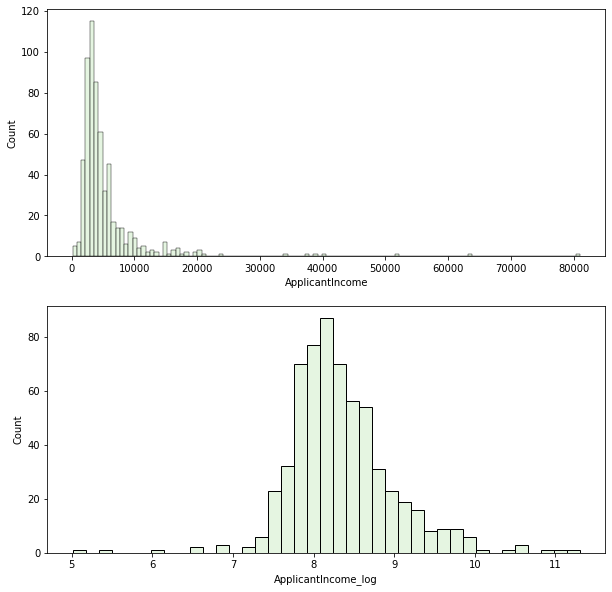

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

df['ApplicantIncome_log'] = df['ApplicantIncome'].apply(lambda x: np.log(x))
sns.histplot(x='ApplicantIncome', data=df, ax=ax[0])
sns.histplot(x='ApplicantIncome_log', data=df, ax=ax[1])

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Status_num,ApplicantIncome_log
0,LP001585,NaN,Yes,3+,Graduate,No,51763,300.0,0,700.0,1.0,Urban,Y,1,10.854431
1,LP001469,Male,No,0,Graduate,Yes,20166,480.0,0,650.0,NaN,Urban,Y,1,9.911753
2,LP001536,Male,Yes,3+,Graduate,No,39999,180.0,0,600.0,0.0,Semiurban,Y,1,10.596610
3,LP002813,Female,Yes,1,Graduate,Yes,19484,360.0,0,600.0,1.0,Semiurban,Y,1,9.877349
4,LP002191,Male,Yes,0,Graduate,No,19730,360.0,5266,570.0,1.0,Rural,N,0,9.889896


In [94]:
pd.DataFrame(round(df.groupby(['Property_Area', 'Education'])['Loan_Status_num'].mean()*100, 2))

Loan_Status_num
Property_Area Education                    
Rural         Graduate                64.12
              Not Graduate            54.17
Semiurban     Graduate                77.01
              Not Graduate            76.09
Urban         Graduate                69.14
              Not Graduate            52.50

In [95]:
df_ = pd.DataFrame(round(df.groupby('Self_Employed')['ApplicantIncome'].mean()*100, 2))
val = df_.values
ind = df_.index
df_ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})
df_['val'] = df_['val'].astype('float64')
df_

,ind,val
0,No,504974.80
1,Yes,738081.71


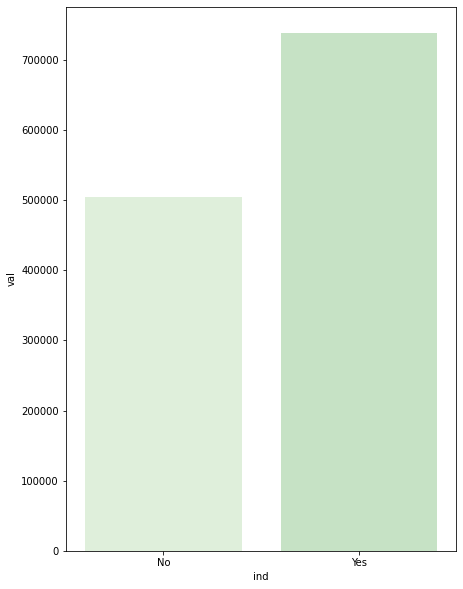

In [96]:
fig, ax = plt.subplots(figsize=(7, 10))

sns.barplot(x='ind', y='val', data=df_)

plt.show()

In [97]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Status_num,ApplicantIncome_log
0,LP001585,NaN,Yes,3+,Graduate,No,51763,300.0,0,700.0,1.0,Urban,Y,1,10.854431
1,LP001469,Male,No,0,Graduate,Yes,20166,480.0,0,650.0,NaN,Urban,Y,1,9.911753
2,LP001536,Male,Yes,3+,Graduate,No,39999,180.0,0,600.0,0.0,Semiurban,Y,1,10.596610
3,LP002813,Female,Yes,1,Graduate,Yes,19484,360.0,0,600.0,1.0,Semiurban,Y,1,9.877349
4,LP002191,Male,Yes,0,Graduate,No,19730,360.0,5266,570.0,1.0,Rural,N,0,9.889896


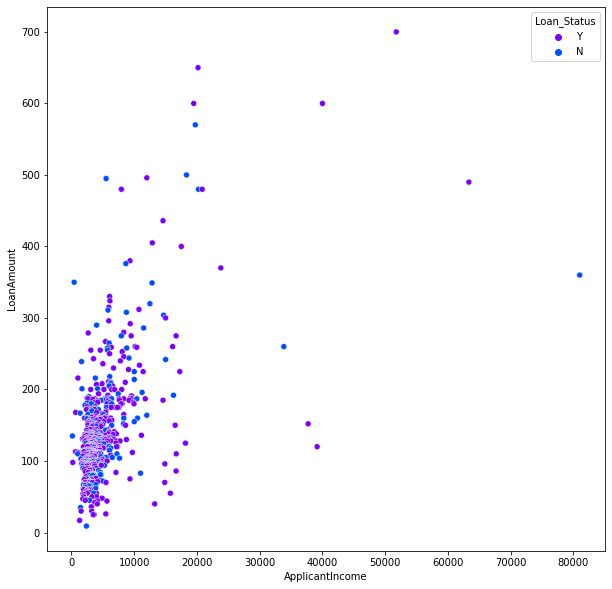

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))
pal = sns.color_palette("gist_rainbow_r")
sns.set_palette("gist_rainbow_r")

sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, hue='Loan_Status')
plt.show()

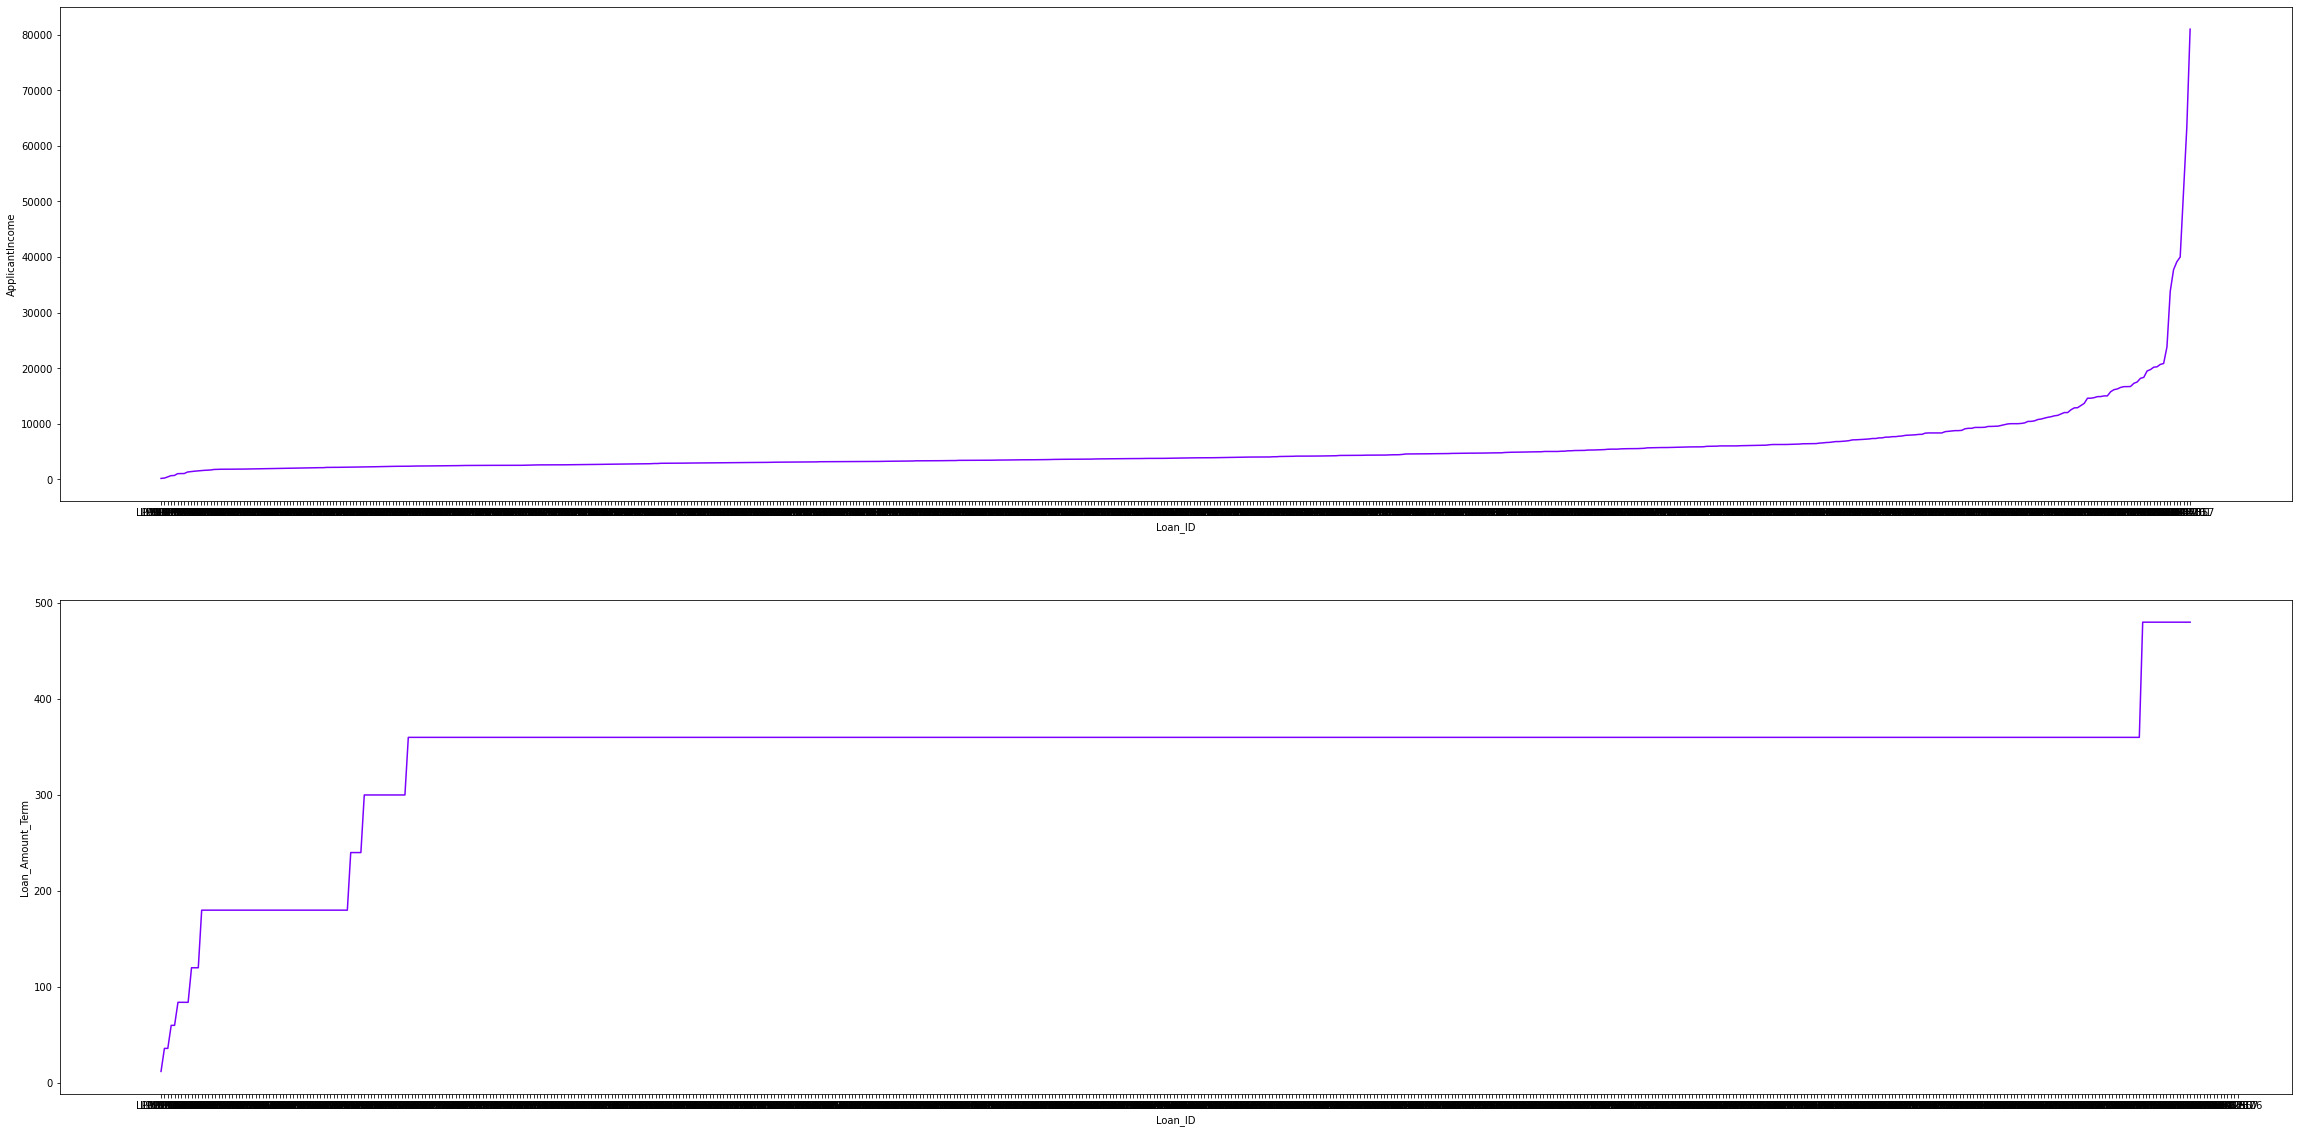

In [99]:
df_ai = df.sort_values(by='ApplicantIncome', ascending=True)
df_la = df.sort_values(by='Loan_Amount_Term', ascending=True)

fig, ax = plt.subplots(2, 1, figsize=(40, 20))

sns.lineplot(x='Loan_ID', y='ApplicantIncome', data=df_ai, ax=ax[0])
sns.lineplot(x='Loan_ID', y='Loan_Amount_Term', data=df_la, ax=ax[1])

plt.show()

In [100]:
df.Credit_History.value_counts()
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [101]:
df.shape

(614, 15)

In [102]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Status_num,ApplicantIncome_log
0,LP001585,NaN,Yes,3+,Graduate,No,51763,300.0,0,700.0,1.0,Urban,Y,1,10.854431


In [103]:
len(df.ApplicantIncome.value_counts())

505

In [104]:
df['Income_bin'] = pd.qcut(df['ApplicantIncome'], 3 , ['High', 'Medium', 'Low'])

In [105]:
df['Income_bin'].value_counts()

High      207
Low       205
Medium    202
Name: Income_bin, dtype: int64

In [106]:
for i in df['Income_bin'].value_counts().index:
  print(i)

High
Low
Medium


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


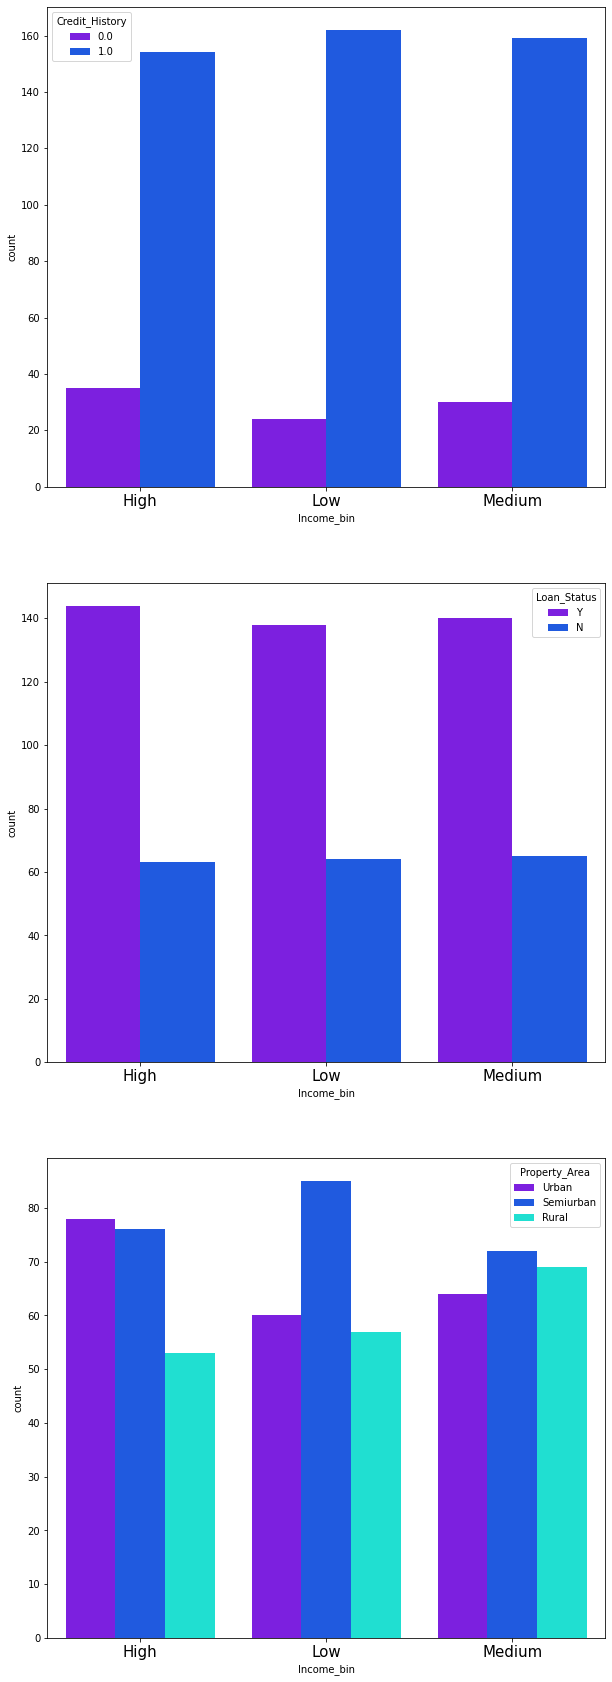

In [107]:
fig, ax = plt.subplots(3, 1, figsize=(10, 30))

sns.countplot('Income_bin', data=df, ax=ax[0], hue='Credit_History')
ax[0].set_xticklabels(df['Income_bin'].value_counts().index, fontsize=15)

sns.countplot('Income_bin', data=df, ax=ax[1], hue='Loan_Status')
ax[1].set_xticklabels(df['Income_bin'].value_counts().index, fontsize=15)

sns.countplot('Income_bin', data=df, ax=ax[2], hue='Property_Area')
ax[2].set_xticklabels(df['Income_bin'].value_counts().index, fontsize=15)
plt.show()

In [108]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Status_num,ApplicantIncome_log,Income_bin
0,LP001585,NaN,Yes,3+,Graduate,No,51763,300.0,0,700.0,1.0,Urban,Y,1,10.854431,Low


In [109]:
df.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
Loan_Amount_Term       14
CoapplicantIncome       0
LoanAmount             22
Credit_History         50
Property_Area           0
Loan_Status             0
Loan_Status_num         0
ApplicantIncome_log     0
Income_bin              0
dtype: int64

In [110]:
#df['filled_age'] = df.groupby(['Sex', 'SibSp'])['Age'].transform(lambda x: x.fillna(np.mean(x)))

In [111]:
df.select_dtypes('object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [112]:
df.groupby(['Gender', 'Education'])['LoanAmount'].mean()

Gender  Education   
Female  Graduate        129.855556
        Not Graduate    111.736842
Male    Graduate        157.994490
        Not Graduate    119.654206
Name: LoanAmount, dtype: float64

In [113]:
#df['LoanAmount'] = df.groupby(['Gender', 'Education'])['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [114]:
df.groupby(['Gender', 'Education'])['Credit_History'].agg(pd.Series.mode)

Gender  Education   
Female  Graduate        1.0
        Not Graduate    1.0
Male    Graduate        1.0
        Not Graduate    1.0
Name: Credit_History, dtype: float64

In [115]:
df['Credit_History'] = df.groupby(['Gender', 'Education'])['Credit_History'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [116]:
df['Self_Employed'] = df.groupby(['Gender', 'Education'])['Self_Employed'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [117]:
df['Gender'] = df.groupby(['Married', 'Education'])['Gender'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [118]:
df = df.dropna()

In [119]:
vals = [i for i in df.columns if df[i].dtype != 'object']

In [120]:
def bxplt(col, df):
  fig, ax = plt.subplots(figsize=(30, 5))

  sns.boxplot(x=col, data=df, ax=ax)
  ax.set_xlabel(col, fontsize=20)
  plt.show()

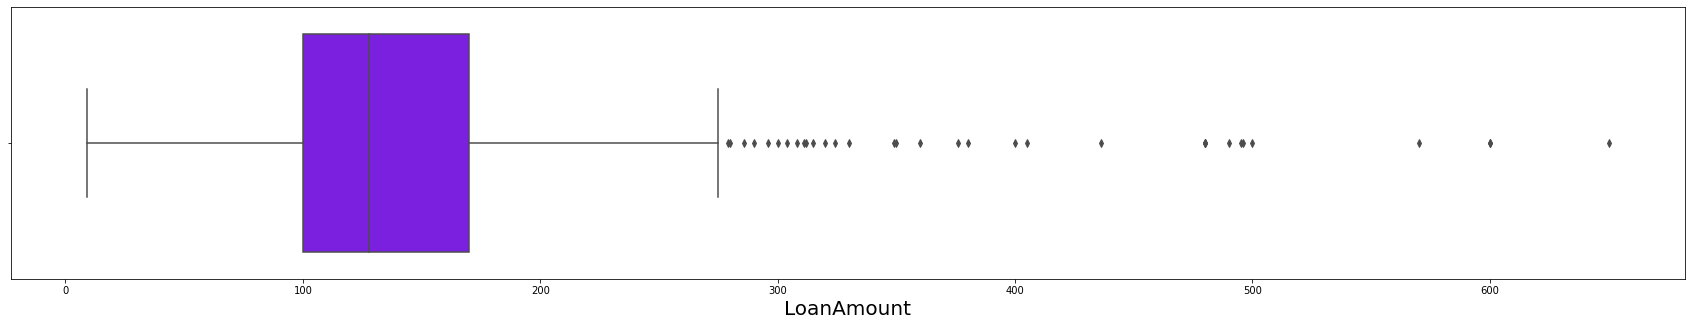

In [121]:
bxplt('LoanAmount', df)

In [122]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

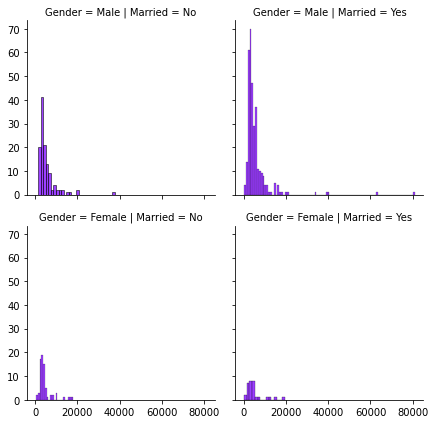

In [123]:
g = sns.FacetGrid(df, col='Married', row='Gender')
g.map_dataframe(sns.histplot, x='ApplicantIncome')
g.add_legend()
plt.show()

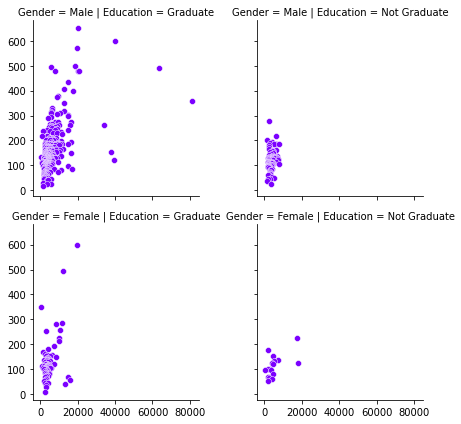

In [124]:
g = sns.FacetGrid(df, col='Education', row='Gender')
g.map_dataframe(sns.scatterplot, x='ApplicantIncome', y='LoanAmount')
g.add_legend()
plt.show()

In [125]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

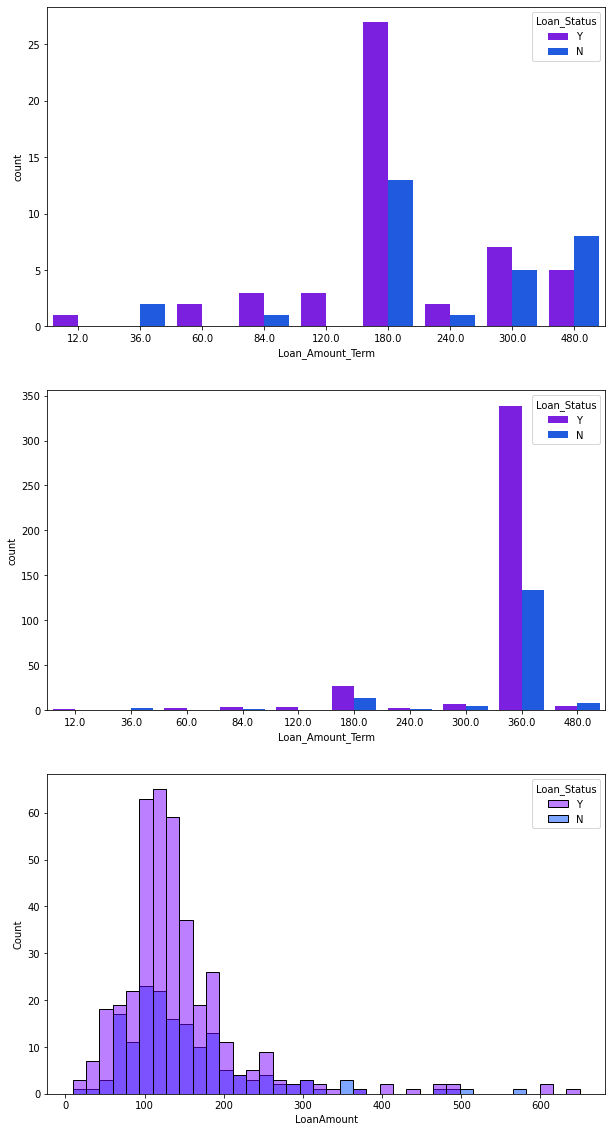

In [126]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

df_ = df.loc[df['Loan_Amount_Term'] != 360]

sns.countplot(x='Loan_Amount_Term', data=df_, ax=ax[0], hue='Loan_Status')
sns.countplot(x='Loan_Amount_Term', data=df, ax=ax[1], hue='Loan_Status')
sns.histplot(x='LoanAmount', data=df, ax=ax[2], hue='Loan_Status')
plt.show()

In [127]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

In [128]:
ind = df.Dependents.value_counts().sort_values(ascending=False).index
val = df.Dependents.value_counts().sort_values(ascending=False).values
df_ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})

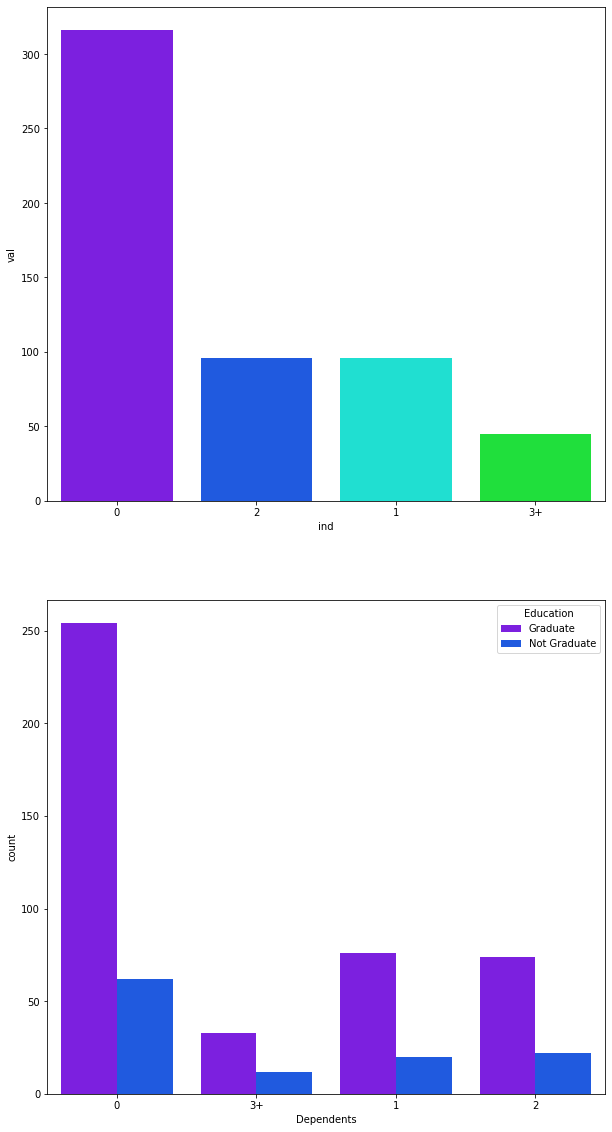

In [129]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

sns.barplot(x='ind', y='val', data=df_, ax=ax[0],)
sns.countplot(x='Dependents', data=df, ax=ax[1], hue='Education')
plt.show()

In [130]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

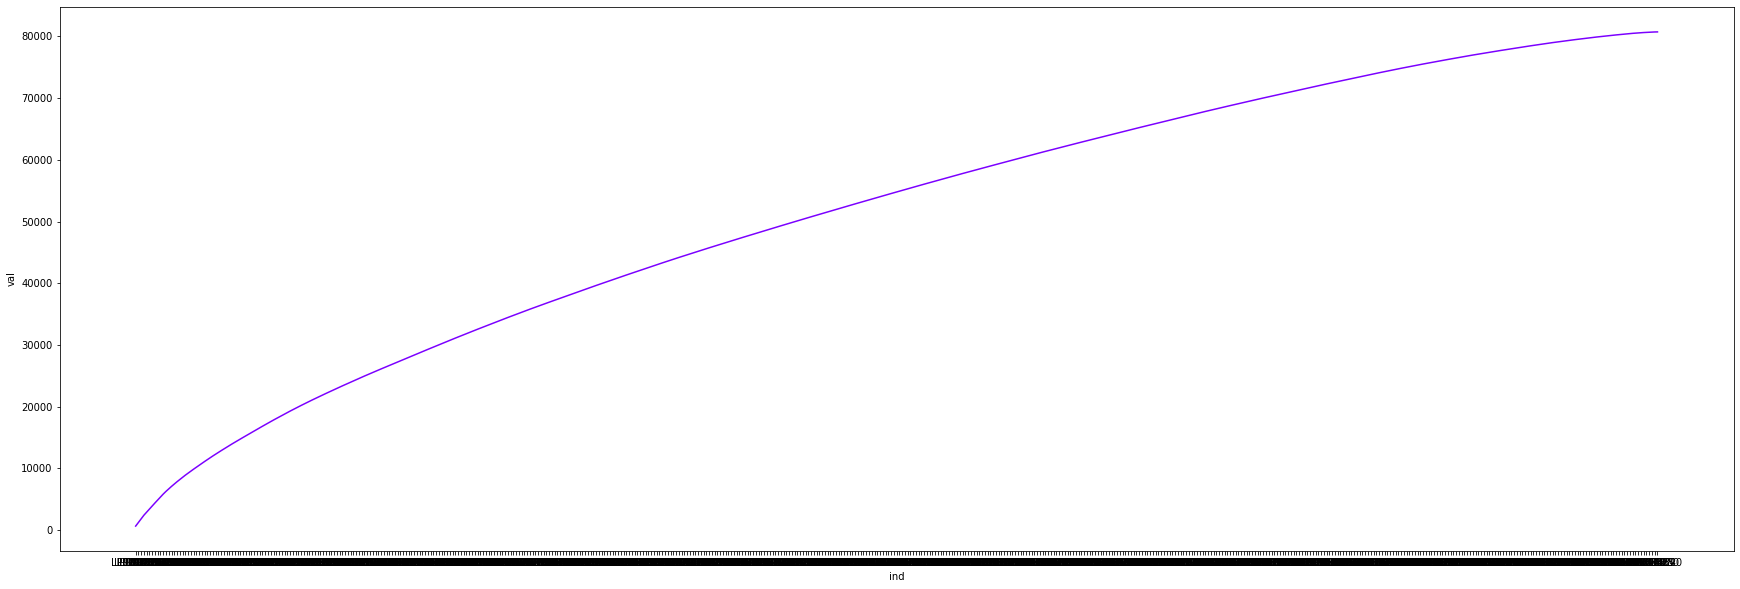

In [131]:
fig, ax = plt.subplots(figsize=(30, 10))

ind = df.Loan_ID
val = df.LoanAmount.cumsum()

df__ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})

sns.lineplot(x='ind', y='val', data=df__, ax=ax)
plt.show()

In [132]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

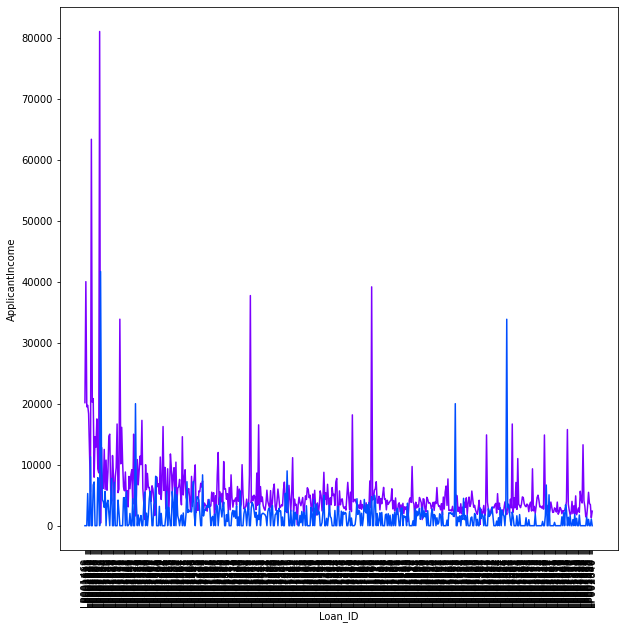

In [133]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x='Loan_ID', y='ApplicantIncome', data=df)
sns.lineplot(x='Loan_ID', y='CoapplicantIncome', data=df)
plt.xticks(df.Loan_ID, rotation=90)
plt.show()

In [134]:
df['Income_bin'] = df['Income_bin'].astype('object')

In [135]:
vals = [i for i in df.columns if df[i].dtype != 'object']

for i in vals:
  q3 = np.percentile(df[i], 75)
  q1 = np.percentile(df[i], 25)
  iqr = q3 - q1
  floor = q1 - iqr*3
  ceil = q3 + iqr*3
  v_lower = df.loc[df[i] < floor, i]
  v_upper = df.loc[df[i] > ceil , i]
  print(f'{i}')
  print(f'Lower: {v_lower}\n')
  print(f'Upper: {v_upper}\n')

ApplicantIncome
Lower: Series([], Name: ApplicantIncome, dtype: int64)

Upper: 1      20166
2      39999
3      19484
4      19730
5      18333
8      63337
9      20233
10     20833
14     17500
18     81000
28     14683
29     15000
38     16666
41     33846
43     16120
56     14999
65     17263
88     16250
195    37719
204    16525
310    18165
333    39147
468    14880
501    16667
538    14866
564    15759
Name: ApplicantIncome, dtype: int64

Loan_Amount_Term
Lower: 2      180.0
8      180.0
15     300.0
19     180.0
35     180.0
       ...  
580    180.0
582    180.0
588    120.0
589    120.0
590    120.0
Name: Loan_Amount_Term, Length: 67, dtype: float64

Upper: 1      480.0
104    480.0
199    480.0
317    480.0
367    480.0
376    480.0
377    480.0
435    480.0
444    480.0
467    480.0
481    480.0
533    480.0
552    480.0
Name: Loan_Amount_Term, dtype: float64

CoapplicantIncome
Lower: Series([], Name: CoapplicantIncome, dtype: int64)

Upper: 7      11300
19     41667
20

In [136]:
df.Education.value_counts(dropna=True)

Graduate        437
Not Graduate    116
Name: Education, dtype: int64

In [137]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

In [138]:
pd.DataFrame(round(df.groupby('Education')['ApplicantIncome'].mean(), 2))

,ApplicantIncome
Education,
Graduate,5744.03
Not Graduate,3865.70


In [139]:
df.groupby(['Education'])['Income_bin'].agg(pd.Series.mode)

Education
Graduate         Low
Not Graduate    High
Name: Income_bin, dtype: object

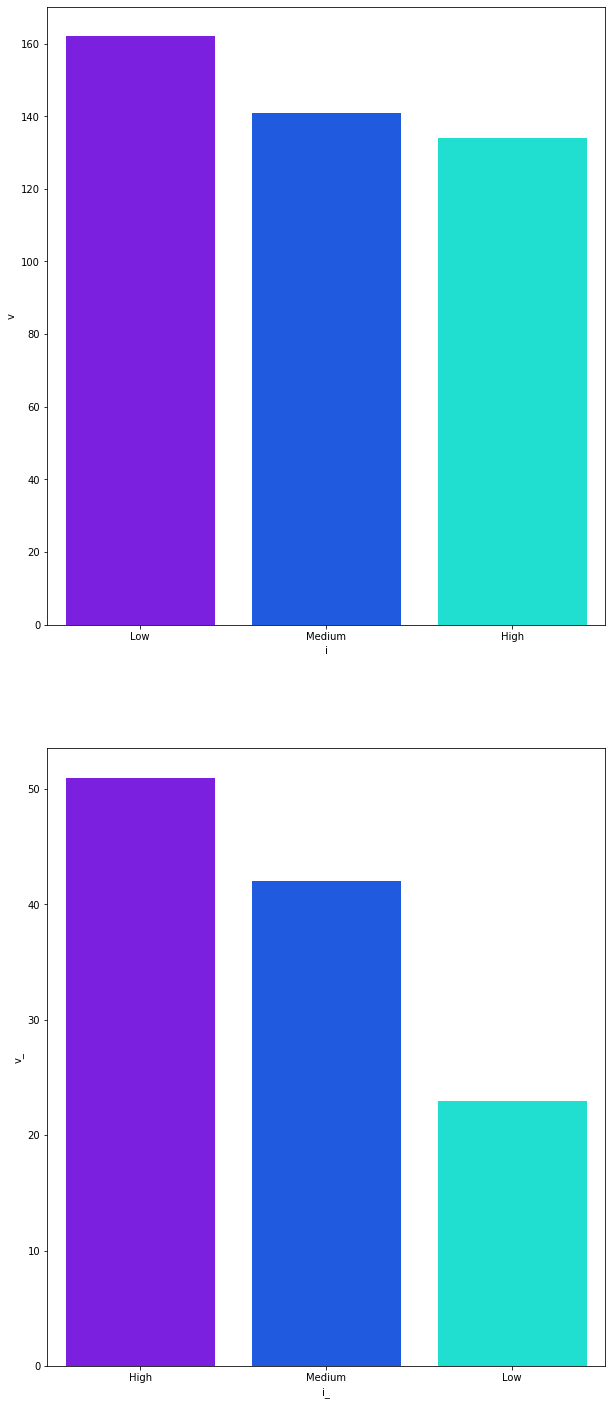

In [140]:
ind = df.loc[df['Education'] == 'Graduate', 'Income_bin'].value_counts()
ind_ = df.loc[df['Education'] != 'Graduate', 'Income_bin'].value_counts()

i = ind.index
v = ind.values

i_ = ind_.index
v_ = ind_.values

df_ = pd.DataFrame(zip(i, v)).rename(columns={0:'i', 1:'v'})
df__ = pd.DataFrame(zip(i_, v_)).rename(columns={0:'i_', 1:'v_'})

fig, ax = plt.subplots(2, 1, figsize=(10, 25))

sns.barplot(x='i', y='v', data=df_, ax=ax[0])
sns.barplot(x='i_', y='v_', data=df__, ax=ax[1])
plt.show()

In [154]:
df.Loan_ID.head()

df.Loan_ID = df.Loan_ID.apply(lambda x: x.split('P00')[1].strip())

In [160]:
df.Credit_History.value_counts()

1.0    482
0.0     71
Name: Credit_History, dtype: int64

In [186]:
def group_by(w, x, y, z, agg):

  if agg == 'mean':
    return pd.DataFrame(round((df.groupby([w, x, y])[z].mean())*100,2))
  
  elif agg == 'mode':
    return pd.DataFrame(df.groupby([w, x, y])[z].agg(pd.Series.mode))


In [195]:
#group_by('Income_bin', 'Credit_History', 'Property_Area', 'Education', 'mode')

In [194]:
pd.DataFrame(df.groupby(['Income_bin', 'Credit_History', 'Gender'])['Education'].agg(pd.Series.mode))

Education
Income_bin Credit_History Gender              
High       0.0            Female      Graduate
                          Male    Not Graduate
           1.0            Female      Graduate
                          Male        Graduate
Low        0.0            Female      Graduate
                          Male        Graduate
           1.0            Female      Graduate
                          Male        Graduate
Medium     0.0            Female      Graduate
                          Male        Graduate
           1.0            Female      Graduate
                          Male        Graduate

In [200]:
df[df['Married'] == 'No'][df['Education'] == 'Not Graduate'][df['Property_Area'] == 'Semiurban']['Credit_History']
df[df['Income_bin'] == 'High'][df['Credit_History'] == 0][df['Gender'] == 'Male']['Education'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Not Graduate    11
Graduate        10
Name: Education, dtype: int64

In [208]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin'],
      dtype='object')

In [210]:
df.ApplicantIncome_log.skew()

0.40729262273469047

In [223]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

np.array(df.ApplicantIncome).reshape(-1, 1)


df.ApplicantIncome_scl = scl.fit_transform(np.array(df.ApplicantIncome).reshape(-1, 1)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [230]:
df__ = pd.DataFrame(df.ApplicantIncome_scl).rename(columns={0:'ApplicantIncome_scl'})

df = pd.concat([df, df__])

In [231]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'Loan_Amount_Term',
       'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Status_num', 'ApplicantIncome_log', 'Income_bin',
       'ApplicantIncome_scl'],
      dtype='object')

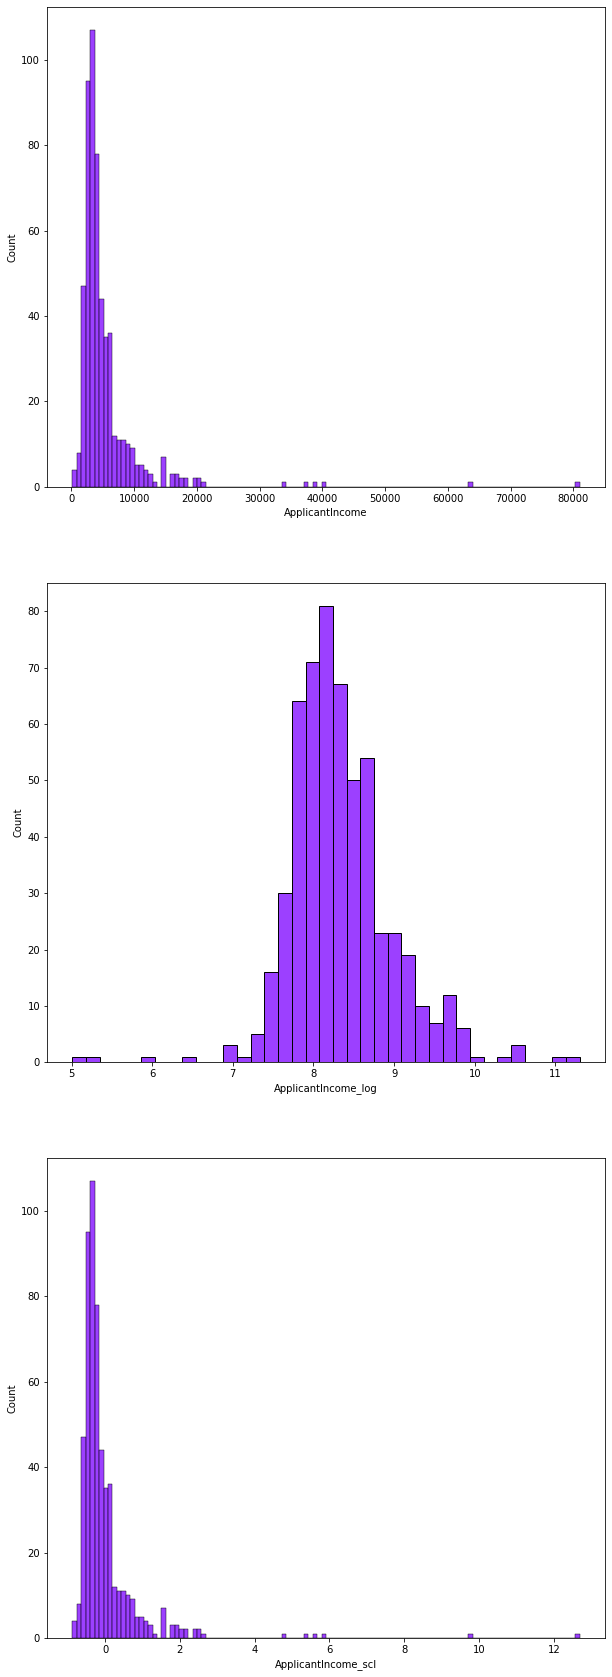

In [234]:
fig, ax = plt.subplots(3, 1, figsize=(10, 30))

sns.histplot(x='ApplicantIncome', data=df, ax=ax[0])
ax[0].set_xlabel('ApplicantIncome')
sns.histplot(x='ApplicantIncome_log', data=df, ax=ax[1])
ax[1].set_xlabel('ApplicantIncome_log')
sns.histplot(x='ApplicantIncome_scl', data=df, ax=ax[2])
ax[2].set_xlabel('ApplicantIncome_scl')
plt.show()